In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import layers, regularizers, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential # Make sure this is imported


# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Create visualizations of some images, and labels

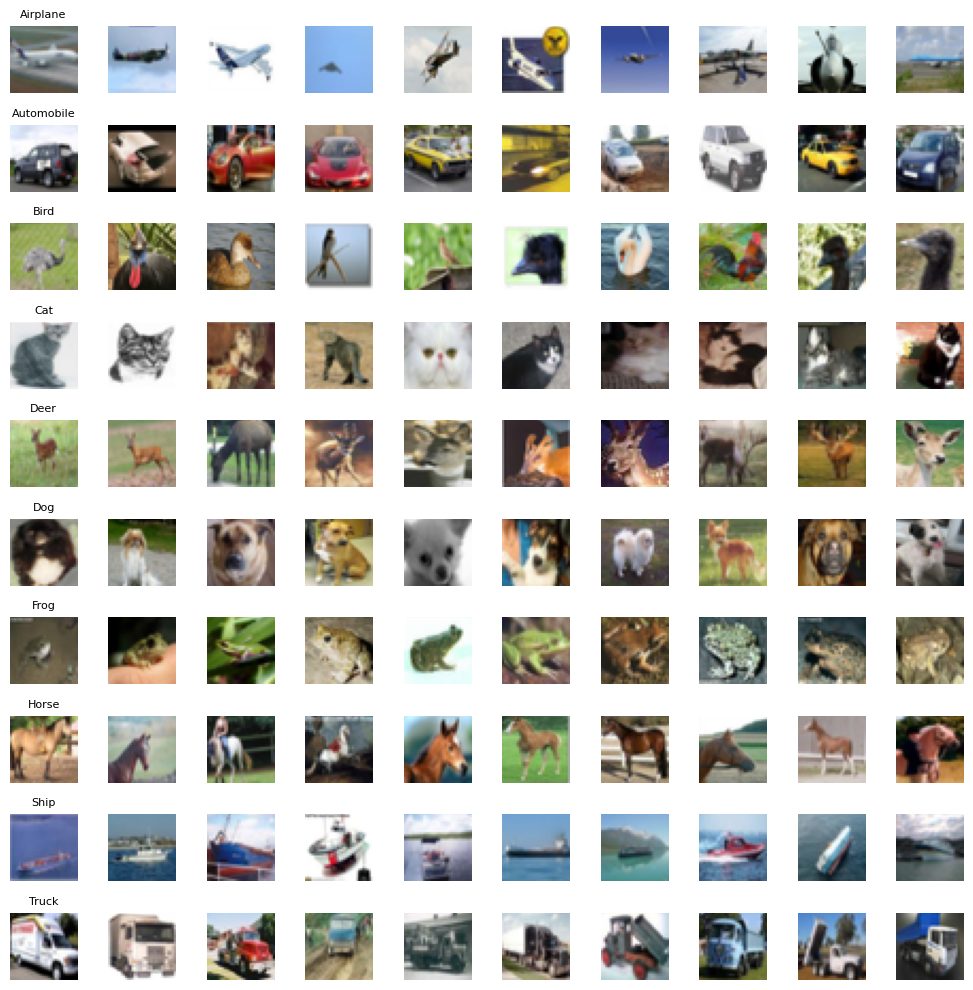

In [ ]:
# CIFAR-10 class names
class_names = [
    "Airplane", "Automobile", "Bird", "Cat", "Deer",
    "Dog", "Frog", "Horse", "Ship", "Truck"
]
# Visualize the image
# Create a 10x10 plot with 10 random samples per class
plt.figure(figsize=(10, 10))  # Set the figure size

# Loop through all 10 classes
for class_index in range(10):
    # Find indices where the label matches the class index
    class_indices = np.where(y_train == class_index)[0]
    # Randomly select 10 samples from these indices
    random_indices = np.random.choice(class_indices, 10, replace=False)

    # Loop through these 10 samples
    for i, image_index in enumerate(random_indices):
        plt.subplot(10, 10, class_index * 10 + i + 1)  # Create a subplot
        plt.imshow(x_train[image_index])  # Show the image
        plt.axis('off')  # Turn off axis
        # Add class name for the first image in the row
        if i == 0:
            plt.title(class_names[class_index], fontsize=8)

plt.tight_layout()  # Adjust layout
plt.show()  # Display the plot

Convert labels to one-hot encoding

In [ ]:
#Convert labels to one-hot encoding `to_categorical` converts labels like [0, 1, 2, ...] to one-hot encoded form

y_train_one_hot = to_categorical(y_train, num_classes=10)
y_test_one_hot = to_categorical(y_test, num_classes=10)


In [ ]:
# Check the convertion of lanels to 0,1...
print(y_train_one_hot,"\n")
print(y_test_one_hot, )

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]] 

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


In [ ]:
# Normalize the images
# Divide pixel values by 255 to scale them to [0, 1]
x_train_normalized = x_train.astype('float32') / 255.0
x_test_normalized = x_test.astype('float32') / 255.0

In [ ]:
# Print example to confirm normalization
print("Original pixel value (before normalization):", x_train[0][0][0])
print("Normalized pixel value:", x_train_normalized[0][0][0])

Original pixel value (before normalization): [59 62 63]
Normalized pixel value: [0.23137255 0.24313726 0.24705882]


Data augmentation

In [ ]:
#initialize resize and rescale layer
import tensorflow as tf
resize_and_rescale = tf.keras.Sequential([
  tf.keras.layers.Resizing(32, 32), # Resize to (32, 32)
  tf.keras.layers.Rescaling(1./255) # Normalize pixel values to [0, 1]
])

In [ ]:
# Data augmentation
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    # tf.keras.layers.RandomRotation(0.1),
    # tf.keras.layers.RandomZoom(0.1),
])

Building a model

In [ ]:
model = Sequential()
# First Block
model.add(layers.Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(0.001),
                             input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
# Second Block
model.add(layers.Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
# Third Block
model.add(layers.Conv2D(256, (3,3), padding='same', kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Conv2D(256, (3,3), padding='same', kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))
# Fully Connected Layers
model.add(layers.Flatten())
model.add(layers.Dense(10, Activation('softmax')))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 16, 16, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 16, 16, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 8, 8, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 8, 8, 256)           │              

 Total params: 1,189,962 (4.54 MB)

 Trainable params: 1,188,170 (4.53 MB)

 Non-trainable params: 1,792 (7.00 KB)

Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.

In [ ]:
from tensorflow.keras.optimizers import Adamax

model.compile(
    loss='categorical_crossentropy',  # Loss function for multi-class classification
    optimizer=Adamax(learning_rate=0.001),  # SGD optimizer with a learning rate of 0.01
    metrics=['accuracy']  # Metric to monitor during training
)

Training the model

In [ ]:
history = model.fit(
    x_train,        # Normalized training images
    y_train_one_hot,           # One-hot encoded training labels
    epochs=30,                 # Number of epochs to train the model
    batch_size=60,            # Number of samples per batch
    validation_split = 0.2,     # Validation Split
    validation_data=(x_test, y_test_one_hot)  # Validation data (test set)
)

Epoch 1/30
834/834 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.3687 - loss: 2.7024

Ploting the accuaraccy

In [ ]:
import matplotlib.pyplot as plt

# Extract the metrics from the training history of the current model
loss = history.history['loss']              # Training loss
val_loss = history.history['val_loss']      # Validation loss
accuracy = history.history['accuracy']      # Training accuracy
val_accuracy = history.history['val_accuracy']  # Validation accuracy

# Step 1: Plot the loss curves
plt.figure(figsize=(10, 5))  # Set figure size

# Training and validation loss
plt.subplot(1, 2, 1)  # Create the first subplot
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()  # Add a legend to distinguish between lines

# Step 2: Plot the accuracy curves
plt.subplot(1, 2, 2)  # Create the second subplot
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()  # Add a legend

# Show the plots
plt.tight_layout()  # Adjust layout
plt.show()

Prediction on X

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
# Evaluate on test set
test_loss, test_acc = model.evaluate(x_test, y_test_one_hot)
print(f"Test Accuracy: {test_acc:.2f}")
# Classification report
y_pred = np.argmax(model.predict(x_test), axis=1)
# Extract true labels from one-hot encoded y_test_one_hot
y_true = np.argmax(y_test_one_hot, axis=1)
print(classification_report(y_true, y_pred, target_names=class_names))
# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.show()

In [ ]:
model.save('CNN_Modelv1.keras')






In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Load pre-trained VGG16
base_model_vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Add custom layers for CIFAR-10
x = base_model_vgg16.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output_layer = Dense(10, activation='softmax')(x)

# Final Model
model_vgg16 = Model(inputs=base_model_vgg16.input, outputs=output_layer)

# Freeze base layers
for layer in base_model_vgg16.layers:
    layer.trainable = False

# Compile
model_vgg16.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train
history_vgg16 = model_vgg16.fit(
    x_train_normalized, y_train_one_hot,
    validation_data=(x_test_normalized, y_test_one_hot),
    epochs=20, batch_size=64
)

# Evaluate
test_loss_vgg16, test_acc_vgg16 = model_vgg16.evaluate(x_test_normalized, y_test_one_hot)
print(f"VGG16 Test Accuracy: {test_acc_vgg16:.2f}")

In [ ]:
from tensorflow.keras.applications import ResNet50

# Load pre-trained ResNet50
base_model_resnet50 = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Add custom layers for CIFAR-10
x = base_model_resnet50.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
output_layer = Dense(10, activation='softmax')(x)

# Final Model
model_resnet50 = Model(inputs=base_model_resnet50.input, outputs=output_layer)

# Freeze base layers
for layer in base_model_resnet50.layers:
    layer.trainable = False

# Compile
model_resnet50.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train
history_resnet50 = model_resnet50.fit(
    x_train_normalized, y_train_one_hot,
    validation_data=(x_test_normalized, y_test_one_hot),
    epochs=20, batch_size=64
)

# Evaluate
test_loss_resnet50, test_acc_resnet50 = model_resnet50.evaluate(x_test_normalized, y_test_one_hot)
print(f"ResNet50 Test Accuracy: {test_acc_resnet50:.2f}")

In [ ]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Input, UpSampling2D

# Define an input layer with the desired shape
input_tensor = Input(shape=(32, 32, 3))

# Upsample the input to meet InceptionV3's requirements
x = UpSampling2D(size=(3, 3))(input_tensor)  # Upsample to 96x96 which is > 75x75

# Load pre-trained InceptionV3
# Use the upsampled input tensor 'x' instead of the original 'input_tensor'
base_model_inception = InceptionV3(weights='imagenet', include_top=False, input_tensor=x)

# Add custom layers for CIFAR-10
x = base_model_inception.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output_layer = Dense(10, activation='softmax')(x)

# Final Model
model_inception = Model(inputs=input_tensor, outputs=output_layer) # Use original input_tensor

# Freeze base layers
for layer in base_model_inception.layers:
    layer.trainable = False

# Compile
model_inception.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train
history_inception = model_inception.fit(
    x_train_normalized, y_train_one_hot,
    validation_data=(x_test_normalized, y_test_one_hot),
    epochs=20, batch_size=64
)

# Evaluate
test_loss_inception, test_acc_inception = model_inception.evaluate(x_test_normalized, y_test_one_hot)
print(f"InceptionV3 Test Accuracy: {test_acc_inception:.2f}")

In [ ]:
print("Test Accuracies:")
print(f"VGG16: {test_acc_vgg16:.2f}")
print(f"ResNet50: {test_acc_resnet50:.2f}")
print(f"InceptionV3: {test_acc_inception:.2f}")